# MACHINE LEARNING DO ZERO EM PYTHON

# INTRODUÇÃO

1.1 - BREVE APRESENTAÇÃO: <br>
- Graduado em Matemática pela USP, pós-graduado em Finanças pela FIA e mestre em Economia pela FGV;
- Passagem por empresas como Itaú Unibanco, HSBC e Vivo. Atualmente, cientista de dados na startup de serviços, GetNinjas;
- Experiência com riscos, cobrança, crédito e precificação;
- Blog de Data Science: www.EstatSite.com.br;
- Canal do Yukio (Youtube): https://www.youtube.com/channel/UCZDVnGEyggjuo2kgpmXdzGA;
- Twitter: @EstatSite;
- Podcast de Tecnologia: Pitacotech;
- Linkedin: https://www.linkedin.com/in/andreyukio/;
- Github: www.github.com/yukioandre;

1.2 - O QUE É MACHINE LEARNING? <br>
<img src='AI-ML-DS.png' style="width: 300px">
- Como o próprio nome já diz, estamos criando máquinas que aprendam (no caso, com dados);
- Exemplo 1: Um filtro de spam que é capaz de identificar caracteres "estranhos" e que sejam indícios de que aquele e-mail é um spam é um programa de aprendizado de máquinas. Exemplo 2: Um programa que seja capaz de identificar se uma avaliação está elogiando ou insultando o estabelecimento também é um aprendizado de máquinas. Por isso aprendizado de máquinas é um campo da Inteligência Artificial - estamos tratando de máquinas que aprendem.
- Polêmica: Por mais que ainda exista relutância de algumas pessoas, machine learning não é estatística/matemática com um nome mais chique;
- Machine learning é sobre predições, pouco esforço humano e aprendizado com os dados;
- Cases famosos: modelo de predição de assintomáticos com Covid; competição para criação do modelo de recomendação da Netflix; predição de Alzheimer.
- Principais tipos de aprendizado: Supervisionado e Não-Supervisionado.

1.3 - O MERCADO DE MACHINE LEARNING: <br>
- Muito recente, em alto crescimento;
- Alta remuneração (não aquelas dos jornais, mas ainda alta se comparada com a média de outras áreas);
- Áreas e cargos ainda em construção, em constante mudança;
- Foco em aprendizado constante: 90% dos cientistas de dados  (Coursera, Datacamp, Udacity, etc).

# HORA DE COLOCAR A MÃO NA MASSA!

## 1 - CARREGA BIBLIOTECA

In [1]:
# Para manipulacao dos dados
import pandas as pd
import numpy as np

# para graficos
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
import dabl

# para modelagem
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


#### Settings ###########
sns.set()
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
plt.style.use("classic")
# plt.rcParams["figure.figsize"] = [10, 5]
%load_ext nb_black

<IPython.core.display.Javascript object>

## 2 - Pré-Processamento

Mais sobre os campos do dataset:
- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 — unskilled and non-resident, 1 — unskilled and resident, 2 — skilled, 3 — highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text — little, moderate, quite rich, rich)
- Checking account (numeric, in DM — Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [2]:
# Carrega o dataset
df = pd.read_csv("german_credit_data.csv", index_col=0)

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


<IPython.core.display.Javascript object>

In [3]:
# Cópia de segurança
df_copy = df.copy()

<IPython.core.display.Javascript object>

In [4]:
df.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


<IPython.core.display.Javascript object>

In [5]:
# Conseguimos saber o tipo da variável, se tem elementos nulos, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


<IPython.core.display.Javascript object>

In [6]:
# Número de linhas e colunas
df.shape

(1000, 10)

<IPython.core.display.Javascript object>

In [7]:
# f-string
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset possui 1000 linhas e 10 colunas.


<IPython.core.display.Javascript object>

In [8]:
# Outro exemplo do uso de f-string
x = 10
print(f"Temos que {x} ao quadrado é igual a: {x**2}")

# Ou ainda em queries
import pandasql as ps

filtro_idade = 70
query = f"""
select * from df
where age > {filtro_idade}
"""

ps.sqldf(query, locals())

Temos que 10 ao quadrado é igual a: 100


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,74,female,3,free,little,moderate,5129,9,car,bad
1,75,male,3,free,little,little,6615,24,car,good
2,74,male,1,own,little,None,3448,5,business,good
3,75,female,3,own,None,little,1374,6,car,good
4,74,male,3,own,little,None,4526,24,business,good
5,74,male,0,own,little,rich,1299,6,car,good


<IPython.core.display.Javascript object>

In [9]:
# Formas de acessar elementos: loc e iloc
df.iloc[0:1, 0:2]
df.loc[0:3, ["Age", "Housing"]]

,Age,Housing
0,67,own
1,22,own
2,49,own
3,45,free


<IPython.core.display.Javascript object>

In [10]:
# pelo nome da coluna (vou usar o head para filtrar só algumas linhas)
df[["Age", "Housing"]].head()

,Age,Housing
0,67,own
1,22,own
2,49,own
3,45,free
4,53,free


<IPython.core.display.Javascript object>

In [11]:
# Estatistica descritiva
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


<IPython.core.display.Javascript object>

In [12]:
# E se quiser estatística por grupo?
df.groupby("Sex")["Age", "Credit amount", "Duration"].mean()

/Users/andremota/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Age,Credit amount,Duration
Sex,,,
female,32.803226,2877.774194,19.43871
male,36.778261,3448.040580,21.56087


<IPython.core.display.Javascript object>

In [13]:
# % de missing:
df.isna().mean()

# Se quisesse numero absoluto: df.isna().sum()
# se quisesse preencher fillna()
# Mas cuidado, preenchimento de missing pra modelagem, só depois do split

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
Risk                0.000
dtype: float64

<IPython.core.display.Javascript object>

In [14]:
# Olhando as variaveis categoricas
df.Sex.value_counts(normalize=True).sort_index()

female    0.31
male      0.69
Name: Sex, dtype: float64

<IPython.core.display.Javascript object>

In [15]:
# pegando nomes das colunas
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

<IPython.core.display.Javascript object>

In [16]:
# Filtros
# Query para logica
# 1)
velhos = df.query("Age > 70")
velhos.head()

# 2)
homens_velhos = df.query("Sex == 'male' & Age > 70")
homens_velhos.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
330,75,male,3,free,little,little,6615,24,car,good
430,74,male,1,own,little,NaN,3448,5,business,good
606,74,male,3,own,little,NaN,4526,24,business,good
756,74,male,0,own,little,rich,1299,6,car,good


<IPython.core.display.Javascript object>

In [17]:
# Método para tentar inferir se a variável é categórica (só para curiosidade, não usaremos)
likely_cat = {}
for var in df.columns:
    likely_cat[var] = 1.0 * df[var].nunique() / df[var].count() < 0.05

likely_cat

{'Age': False,
 'Sex': True,
 'Job': True,
 'Housing': True,
 'Saving accounts': True,
 'Checking account': True,
 'Credit amount': False,
 'Duration': True,
 'Purpose': True,
 'Risk': True}

<IPython.core.display.Javascript object>

In [18]:
# no formato de função
def categoricals(dataframe, perc):
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.0 * df[var].nunique() / df[var].count() < 0.05

    categoricals = []
    non_categoricals = []
    for column, is_categorical in likely_cat.items():
        if is_categorical:
            categoricals.append(column)
        else:
            non_categoricals.append(column)

    return (
        print("Features que possivelmente são categóricas:"),
        print(*categoricals, sep=", "),
    )


categoricals(df, 0.05)

Features que possivelmente são categóricas:
Sex, Job, Housing, Saving accounts, Checking account, Duration, Purpose, Risk


(None, None)

<IPython.core.display.Javascript object>

In [19]:
# Vamos criar uma variavel resposta mais intuitiva
df["Target"] = np.where(df["Risk"] == "bad", 1, 0)

<IPython.core.display.Javascript object>

In [20]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Target
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,49,male,1,own,little,NaN,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0
4,53,male,2,free,little,little,4870,24,car,bad,1


<IPython.core.display.Javascript object>

In [21]:
df.drop("Risk", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [22]:
df.Target.value_counts()

0    700
1    300
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

## 3 - Analise Exploratória

PLOTS COM PANDAS

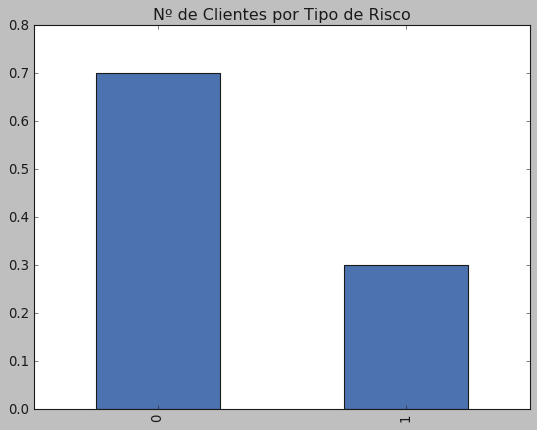

<IPython.core.display.Javascript object>

In [23]:
# Plots com o proprio pandas (+ matplotlib para o título) - Colocar legenda nas barras somente por localização
# _ = plt.figure(figsize=(10, 4))
_ = df.Target.value_counts(normalize=True).plot(kind="bar")
_ = plt.title("Nº de Clientes por Tipo de Risco")
_ = plt.ylim(0, 0.8)

# Como seria colocar os valores sobre as barras:
# for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

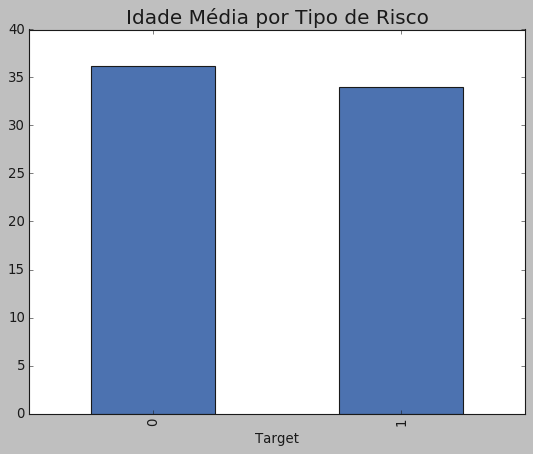

<IPython.core.display.Javascript object>

In [24]:
_ = df.groupby("Target")["Age"].mean().plot(kind="bar")
_ = plt.title("Idade Média por Tipo de Risco", size=18)

PLOTS COM MATPLOTLIB (FOCO NA HIERARQUIA)

<img src='matplotlib_framework.png' style="width: 500px">

Text(0.5, 0, 'Age')

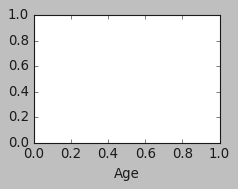

<IPython.core.display.Javascript object>

In [25]:
# Veja como vai sendo construído
plt.figure(figsize=(3, 2))
plt.xlabel("Age")

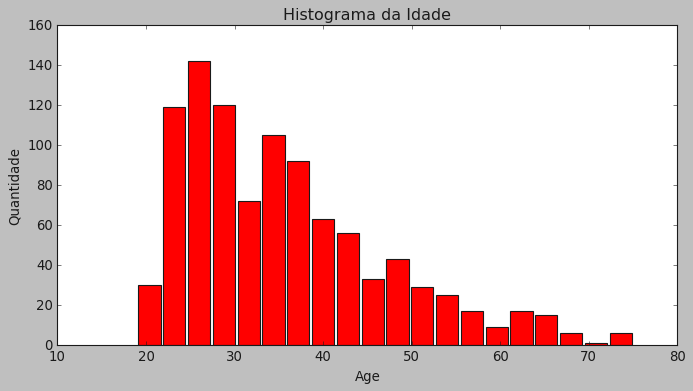

<IPython.core.display.Javascript object>

In [26]:
# Note que vamos adicionando elementos ao desenho

_ = plt.figure(figsize=(10, 5))
_ = plt.hist(
    data=df, x="Age", bins=20, rwidth=0.9, color="red"
)  # rwidth 70% of the bar , useful for plotting discrete values
# plt.xticks(np.arange(20, 77, 5))
_ = plt.xlabel("Age")
_ = plt.title("Histograma da Idade")
_ = plt.ylabel("Quantidade")

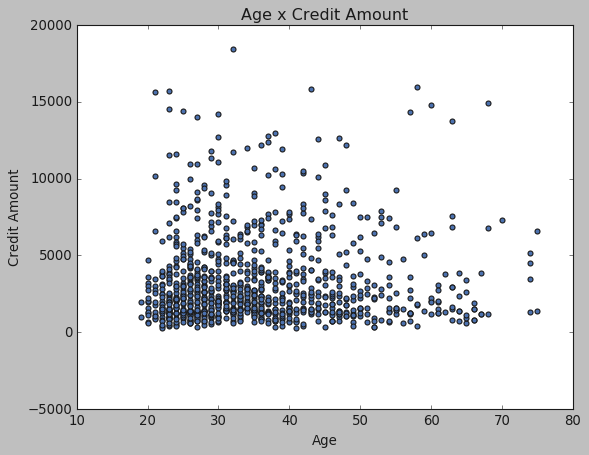

<IPython.core.display.Javascript object>

In [27]:
# grafico de dispersao
_ = plt.scatter("Age", "Credit amount", data=df)
_ = plt.title("Age x Credit Amount")
_ = plt.xlabel("Age")
_ = plt.ylabel("Credit Amount")

PLOTS COM SEABORN

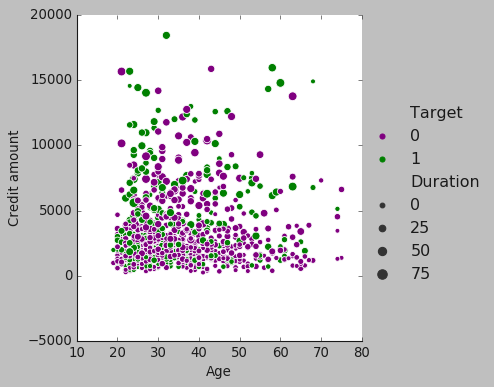

<IPython.core.display.Javascript object>

In [28]:
# Explorando relação de múltiplas variáveis
_ = sns.relplot(
    x="Age",
    y="Credit amount",
    hue="Target",
    data=df,
    palette=["purple", "green"],
    size="Duration",
)

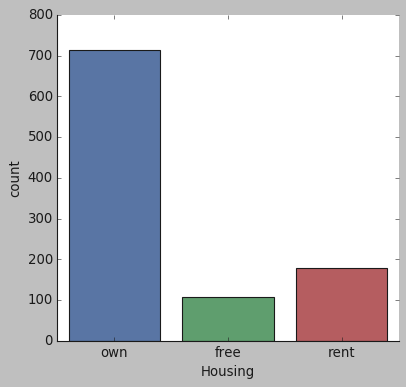

<IPython.core.display.Javascript object>

In [29]:
# Gráfico de contagem por categoria
_ = sns.catplot(x="Housing", kind="count", data=df)

DASHES AUTOMATIZADOS

In [30]:
# Automatizacoes: sweetviz - dashboard com uma linha
my_report = sv.analyze(df)
my_report.show_html()  # Default arguments will generate to "SWEETVIZ_REPORT.html"

:FEATURES DONE:                    |                     | [  0%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


<IPython.core.display.Javascript object>

In [31]:
# Automatizacoes: dabl
# dabl.plot(df, Target_col="Target")

<IPython.core.display.Javascript object>

## 4 - Random Forest

Primeiro, um exemplo simples de árvore de decisão:

<img src='arvore_de_decisao.png'>

Mais sobre o modelo, você encontra aqui: https://estatsite.com.br/2016/06/11/1970/

Agora, vejamos a Random Forest, um algoritmo baseado em árvores de decisão:

<img src='Random_forest_diagram_complete.png'>

RF combina a simplicidade das árvores de decisão com a flexibilidade de aprender de amostras novas (menor risco de overfitting).

Como funciona a Random Forest:
- Coletamos uma amostra do dataset original, podendo haver repetições;
- Começamos a construção de uma árvore de decisão a partir do dataset gerado pela amostragem acima;
- Na hora de selecionar qual a feature do primeiro nó (=root node), consideramos um subconjunto das features disponíveis no dataset;
- Na hora de escolher a feature do nó seguinte, também selecionamos a partir de um subconjunto das variáveis que restaram;
- Seguimos fazendo isso até finalizar a árvore;
- Note: o subconjunto de features pode ter tamanho 2, 3, ..., n. É preciso escolher o que gera melhor desempenho;
- Pegue o processo e repita centenas de vezes. I.e., construímos centenas de árvores de decisão.
- Como usamos as árvores?
- Pegue o primeiro data point (o primeiro "indivíduo" do nosso conjunto de dados) e rode ele na primeira árvore. Suponha que a gente esteja construindo um modelo para previsão de bom ou mau pagador. A previsão da primeira árvore é que o primeiro indivíduo é um mau pagador. Aí, rodamos para a segunda árvore. Ela também diz que ele será um bom pagador. Repetimos isso para todas árvores. Vemos qual opção recebeu mais votos. Como a maioria das árvores teve como previsão que o indivíduo seria um bom pagador, nossa previsão é que ele será um bom pagador.

Termo importante:
- Ensemble learning: Uso de múltiplos algoritmos para obter melhor desempenho preditivo.

In [32]:
# Vamos listar as features
features = ["Age", "Job", "Credit amount", "Purpose", "Housing", "Duration"]
target = "Target"

<IPython.core.display.Javascript object>

In [33]:
# Agora, dividimos antes de qualquer pré-processamento
from sklearn.model_selection import train_test_split

X = df[features]  # Features
y = df[target]  # Labels

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999
)

<IPython.core.display.Javascript object>

In [34]:
X_train

,Age,Job,Credit amount,Purpose,Housing,Duration
763,30,3,12680,car,free,21
534,25,2,3105,radio/TV,own,24
86,27,2,1295,furniture/equipment,own,18
927,39,2,10297,car,free,48
134,21,2,10144,radio/TV,own,60
...,...,...,...,...,...,...
712,46,3,2476,car,own,21
481,26,2,1201,car,own,24
869,24,2,652,furniture/equipment,rent,12
348,34,1,1743,business,own,6


<IPython.core.display.Javascript object>

In [36]:
# Precisamos tratar as variáveis categóricas (Cuidado quando for numérica)
cat_features = ["Job", "Housing", "Purpose"]
num_features = ["Age", "Credit amount", "Duration"]

<IPython.core.display.Javascript object>

In [37]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=cat_features)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


<IPython.core.display.Javascript object>

In [38]:
X_train

,Age,Job_1,Job_2,Job_3,Job_4,Credit amount,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration
763,30,1,0,0,0,12680,1,0,0,0,0,0,0,0,1,0,0,21
534,25,0,1,0,0,3105,0,1,0,0,0,0,0,0,0,1,0,24
86,27,0,1,0,0,1295,0,0,1,0,0,0,0,0,0,1,0,18
927,39,0,1,0,0,10297,1,0,0,0,0,0,0,0,1,0,0,48
134,21,0,1,0,0,10144,0,1,0,0,0,0,0,0,0,1,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,46,1,0,0,0,2476,1,0,0,0,0,0,0,0,0,1,0,21
481,26,0,1,0,0,1201,1,0,0,0,0,0,0,0,0,1,0,24
869,24,0,1,0,0,652,0,0,1,0,0,0,0,0,0,0,1,12
348,34,0,0,1,0,1743,0,0,0,1,0,0,0,0,0,1,0,6


<IPython.core.display.Javascript object>

In [39]:
clf_RF = RandomForestClassifier()  # instanciar (= inicializar, criar o objeto)
clf_RF.fit(X_train, y_train)  # treina o modelo


RandomForestClassifier()

<IPython.core.display.Javascript object>

In [40]:
# aplica no teste
y_pred = clf_RF.predict(X_test)

<IPython.core.display.Javascript object>

In [41]:
# metricas de avaliacao
from sklearn.metrics import accuracy_score, confusion_matrix

print("Acurácia: " + str(accuracy_score(y_test, y_pred)))  # acertos ao todo

from sklearn.metrics import f1_score

print(
    "F1 Score: {}".format(f1_score(y_test, y_pred))
)  # indica poucos falsos positivos e falsos negativos, quanto mais próximo de 1, melhor

Acurácia: 0.6333333333333333
F1 Score: 0.24657534246575338


<IPython.core.display.Javascript object>

In [42]:
print("Matriz de Confusão : \n" + str(confusion_matrix(y_test, y_pred)))

Matriz de Confusão : 
[[172  27]
 [ 83  18]]


<IPython.core.display.Javascript object>

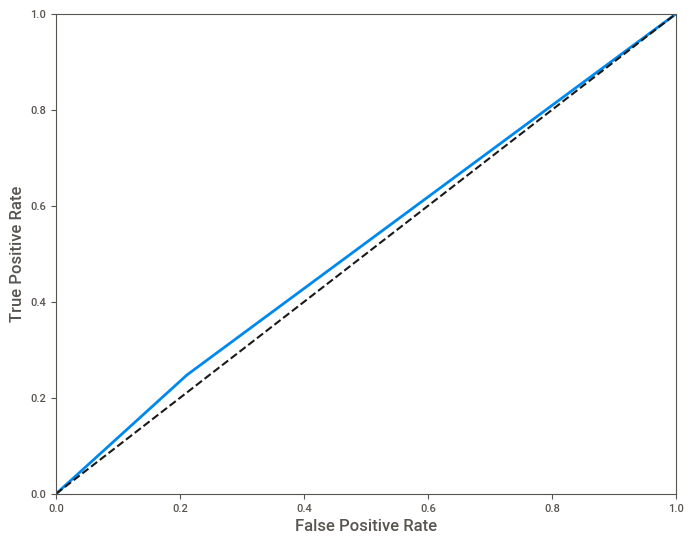

<IPython.core.display.Javascript object>

In [43]:
# CURVA ROC: calcula fpr e tpr para vários limiares
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# probabilidades
# probs = clf_RF.predict_proba(X_test)

y_scores = cross_val_predict(clf_RF, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


plot_roc_curve(fpr, tpr)

In [44]:
clf_RF.feature_importances_

array([0.23824384, 0.02028735, 0.0233586 , 0.023794  , 0.00666445,
       0.31499693, 0.02986172, 0.02084308, 0.02014214, 0.01610292,
       0.01094859, 0.00374548, 0.00642193, 0.01597128, 0.01475557,
       0.02213283, 0.01680895, 0.19492032])

<IPython.core.display.Javascript object>

In [45]:
# FEATURE IMPORTANCE
feature_imp = pd.Series(clf_RF.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
feature_imp

Credit amount    0.314997
Age              0.238244
Duration         0.194920
Purpose_1        0.029862
Job_3            0.023794
Job_2            0.023359
Housing_2        0.022133
Purpose_2        0.020843
Job_1            0.020287
Purpose_3        0.020142
Housing_3        0.016809
Purpose_4        0.016103
Purpose_8        0.015971
Housing_1        0.014756
Purpose_5        0.010949
Job_4            0.006664
Purpose_7        0.006422
Purpose_6        0.003745
dtype: float64

<IPython.core.display.Javascript object>

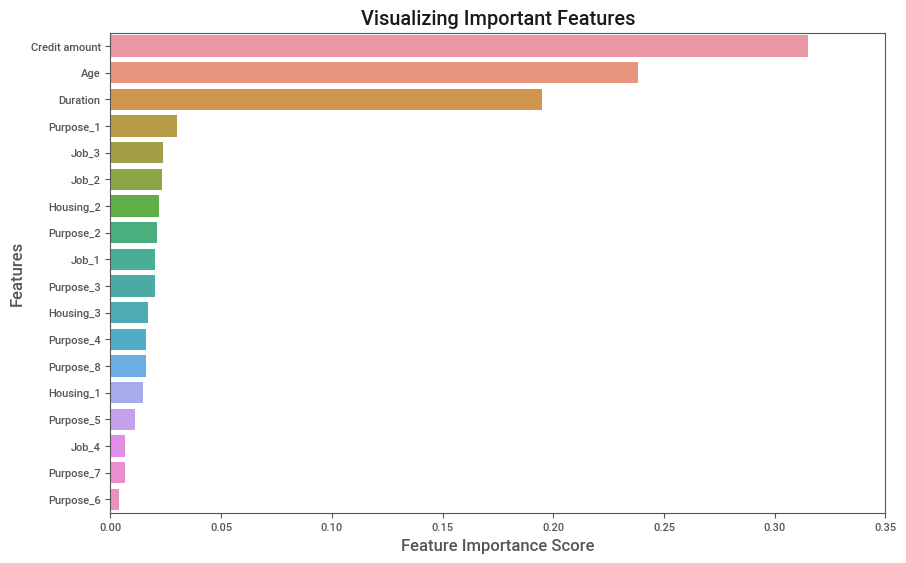

<IPython.core.display.Javascript object>

In [46]:
# Creating a bar plot
_ = plt.figure(figsize=(10, 6))
_ = sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
_ = plt.xlabel("Feature Importance Score")
_ = plt.ylabel("Features")
_ = plt.title("Visualizing Important Features")
_ = plt.savefig("rf_features.png")

Formas de melhorar o modelo:
- Obter mais observações (mais data points);
- Obter novas features (Há um post no blog com o dataset completo e o resultado é MUITO melhor);
- Tunar os hiperparâmetros (muito cuidado com o overfitting);
- Realizar tratativas diferentes. Ex.: ao invés de one-hot encoding, aplicar target encoding. Ex2: Ao invés de preencher missing com a média, preencher com mediana ou aplicar MICE.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

# Tunando os hiperparâmetros:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    "n_estimators": randint(4, 200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    "max_features": truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    "min_samples_split": uniform(0.01, 0.199),
}

# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=500, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint

pprint(model.best_estimator_.get_params())

In [ ]:
model.best_estimator_

In [ ]:
clf_random = RandomForestClassifier(
    max_features=0.29584293321249716,
    min_samples_split=0.01327608925268778,
    n_estimators=126,
)
clf_random.fit(X_train, y_train)  # treina o modelo

# aplica no teste
clf_random.fit(X_train, y_train)
y_pred_random = clf_random.predict(X_test)

print("Acurácia: " + str(accuracy_score(y_test, y_pred_random)))

print("F1 Score: {}".format(f1_score(y_test, y_pred_random)))

Comentários adicionais:
- Imputar missing somente após o split! (Maior erro nos tutoriais que temos pela internet!)
- Machine Learning não é apenas estatística e modelos matemáticos (o mesmo vale para data science);
- Cuidado com dados desbalanceados;
- Não deixe de estudar temas mais relacionados à computação do que modelagem, como virtual environments, Python Orientado a Objetos, refatoração, Github, etc;
- Contribua para a comunidade, disponibilize códigos, ajude os outros, retribua o que você tem recebido;
- Usem Pipelines (!!!) https://estatsite.com.br/?s=pipeline#google_vignette
- Aprendam sobre testes
- Estudem nuvem

Outras fontes bacanas:
- Como funciona uma Random Forest: https://www.youtube.com/watch?v=J4Wdy0Wc_xQ
- Como rodar um classificador Random Forest no Python: https://estatsite.com.br/2020/09/27/random-forest-em-python/
- Ordem dos tratamentos: https://datascience.stackexchange.com/questions/53138/which-comes-first-multiple-imputation-splitting-into-train-test-or-standardiz
- Lidando com valores nulos: https://www.kaggle.com/csprock/properly-handling-missing-values-w-out-packages
- Alternativas ao one-hot encoding: https://towardsdatascience.com/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809

Livros Gratuitos:
- Toda Coleção da Springer (Melhor editora da área!): https://estatsite.com.br/2020/04/02/livros-da-springer-gratuitos/
- Interpretable Machine Learning: https://christophm.github.io/interpretable-ml-book/index.html